In [4]:
import pandas as pd
import os

# basic setup before starting detection task
# Define the file path
file_path = r"C:\Users\Yawar\Detecting_Data_Breaches\data\anomalies.csv"

# Check if the file exists
if os.path.exists(file_path):
    print("File found! Loading data...")
    # Load the dataset
    logs = pd.read_csv(file_path)
    print("Data loaded successfully.")
    
    # Display a preview of the data
    print("Preview of the data:")
    print(logs.head())
else:
    print(f"File not found at {file_path}. Please check the path and try again.")



File found! Loading data...
Data loaded successfully.
Preview of the data:
                    timestamp  user_id        activity   location   status  \
0  2024-11-30 00:19:24.728819  user_65     file_upload  Bangalore  success   
1  2024-12-01 08:19:24.728819  user_72           login  Bangalore   failed   
2  2024-11-22 07:19:24.728819  user_21  password_reset       Pune  success   
3  2024-11-16 05:19:24.728819  user_78     file_upload     Mumbai  success   
4  2024-12-01 05:19:24.728819  user_45           login     Mumbai  success   

   hour        date  time_diff  \
0     0  2024-11-30        NaN   
1     8  2024-12-01        NaN   
2     7  2024-11-22        NaN   
3     5  2024-11-16        NaN   
4     5  2024-12-01        NaN   

                                   activity_sequence  unusual_time  \
0  file_upload -> login -> login -> file_upload -...             1   
1  login -> file_upload -> file_upload -> passwor...             0   
2  password_reset -> login -> login -> lo

Defining Thresholds for Anomaly Detection:
Low risk: anomaly_score ≤ 1
Medium risk: 1 < anomaly_score ≤ 2
High risk: anomaly_score > 2


In [6]:
def classify_anomalies(score):
    if score > 2:
        return "High Risk"
    elif score > 1:
        return "Medium Risk"
    else:
        return "Low Risk"

logs['risk_category'] = logs['anomaly_score'].apply(classify_anomalies)


Summarising anamoly score to find problematic ones

In [7]:
user_summary = logs.groupby('user_id').agg({
    'anomaly_score': 'sum',
    'risk_category': lambda x: (x == 'High Risk').sum()
}).reset_index()

user_summary.columns = ['user_id', 'total_anomaly_score', 'high_risk_count']
user_summary = user_summary.sort_values(by='total_anomaly_score', ascending=False)
print(user_summary)


    user_id  total_anomaly_score  high_risk_count
75  user_77                   13                0
62  user_65                   13                0
5   user_13                   11                0
55  user_59                   11                0
36  user_41                   11                0
..      ...                  ...              ...
49  user_53                    2                0
74  user_76                    2                0
81  user_82                    2                0
17  user_24                    1                0
43  user_48                    1                0

[100 rows x 3 columns]


Visualising results
1. Bar chart
2. pie chart

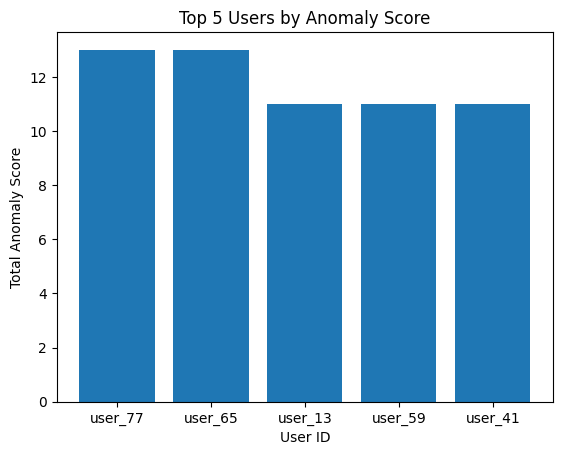

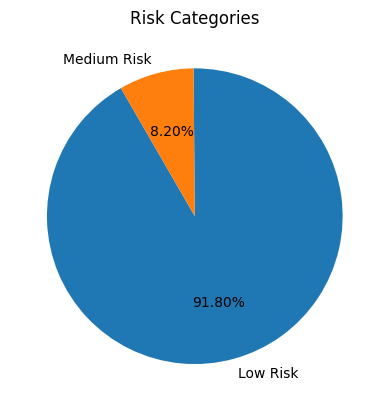

In [17]:
import matplotlib.pyplot as plt

# Bar Chart
top_users = user_summary.head(5)
plt.bar(top_users['user_id'], top_users['total_anomaly_score'])
plt.title('Top 5 Users by Anomaly Score')
plt.xlabel('User ID')
plt.ylabel('Total Anomaly Score')
plt.show()

# Pie Chart
risk_counts = logs['risk_category'].value_counts()
plt.pie(risk_counts, labels=risk_counts.index, autopct='%2.2f%%',startangle=120 )
plt.title('Risk Categories')
plt.show()


Saving the output as CSV files.

In [10]:
import os

# Define the folder where files should be saved
output_folder = r"C:\Users\Yawar\Detecting_Data_Breaches\data\processed"

# Ensuring the folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)  # Creating the folder if it doesn't exist
    print(f"Created output folder: {output_folder}")
else:
    print(f"Output folder exists: {output_folder}")

# Defining the file paths
processed_logs_path = os.path.join(output_folder, 'processed_logs_with_risk.csv')
user_summary_path = os.path.join(output_folder, 'user_anomaly_summary.csv')

# Saving the CSV files
logs.to_csv(processed_logs_path, index=False)
user_summary.to_csv(user_summary_path, index=False)

print(f"Processed logs saved to: {processed_logs_path}")
print(f"User summary saved to: {user_summary_path}")


Created output folder: C:\Users\Yawar\Detecting_Data_Breaches\data\processed
Processed logs saved to: C:\Users\Yawar\Detecting_Data_Breaches\data\processed\processed_logs_with_risk.csv
User summary saved to: C:\Users\Yawar\Detecting_Data_Breaches\data\processed\user_anomaly_summary.csv
